In [1]:
# %reset
# Para visualización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
from IPython.display import Audio, Markdown, Image
import pylab
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

# Archivos
import urllib.request
import glob

# Análisis de sonido
import spotipy 

# Machine learning
# importar los paquetes para clustering
from sklearn.preprocessing import StandardScaler

# To work with categorical types
from pandas.api.types import CategoricalDtype

# Clustering (scipy)
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.pairwise import euclidean_distances

from funciones import plot_silhouette
from funciones import plot_silhouettes_and_sses
from funciones import get_silhouette_avg
from funciones import get_sse
from funciones import vanDongen

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import MDS, Isomap, SpectralEmbedding, TSNE

from umap import UMAP

from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido
import librosa
import librosa.display

Se levanta el dataset de metadata para decidir sobre qué track se va a realizar el clustering espectral.

In [2]:
metadata = pd.read_csv('../data/metadata.csv', index_col='id')

In [3]:
metadata.shape

(2206, 17)

In [4]:
metadata.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,is_local,name,popularity,preview_url,track_number,type,uri,genre
id,,,,,,,,,,,,,,,,,
5i2sgqnzaxYpvXmGAB592h,"{'album_type': 'ALBUM', 'artists': [{'external...",Stan Getz,[],1,253933,False,{'isrc': 'USPR36307074'},{'spotify': 'https://open.spotify.com/track/5i...,https://api.spotify.com/v1/tracks/5i2sgqnzaxYp...,False,Corcovado - Quiet Nights Of Quiet Stars,12,NaN,5,track,spotify:track:5i2sgqnzaxYpvXmGAB592h,jazz
4mGzm5ahHxMX5IhVWbU7cl,"{'album_type': 'ALBUM', 'artists': [{'external...",Nina Simone,[],1,249823,False,{'isrc': 'QMSGD1370010'},{'spotify': 'https://open.spotify.com/track/4m...,https://api.spotify.com/v1/tracks/4mGzm5ahHxMX...,False,I Loves You Porgy,6,NaN,10,track,spotify:track:4mGzm5ahHxMX5IhVWbU7cl,jazz
4DEn3hZzSs9MFwFNDla5Y5,"{'album_type': 'ALBUM', 'artists': [{'external...",Chick Corea,"['AD', 'AE', 'AR', 'AT', 'BE', 'BO', 'BR', 'CA...",1,185826,False,{'isrc': 'USC4R0303698'},{'spotify': 'https://open.spotify.com/track/4D...,https://api.spotify.com/v1/tracks/4DEn3hZzSs9M...,False,Swedish Landscape - Live,15,NaN,11,track,spotify:track:4DEn3hZzSs9MFwFNDla5Y5,jazz
5P6vo51dtkBYWXswH1twvK,"{'album_type': 'ALBUM', 'artists': [{'external...",Snarky Puppy,[],1,645893,False,{'isrc': 'US8JA1411008'},{'spotify': 'https://open.spotify.com/track/5P...,https://api.spotify.com/v1/tracks/5P6vo51dtkBY...,False,Lingus,0,NaN,8,track,spotify:track:5P6vo51dtkBYWXswH1twvK,jazz
29TZQMVLv25CBm3bYn2EIQ,"{'album_type': 'ALBUM', 'artists': [{'external...",Sam Rivers,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,326400,False,{'isrc': 'USBN20100519'},{'spotify': 'https://open.spotify.com/track/29...,https://api.spotify.com/v1/tracks/29TZQMVLv25C...,False,Kinda Dukish,12,NaN,2,track,spotify:track:29TZQMVLv25CBm3bYn2EIQ,jazz


In [5]:
metadata[metadata.genre == 'world-music'][['artists', 'genre']]

,artists,genre
id,,
2YBFbI8ESZD8ELOeFvAQIc,Mulatu Astatke,world-music
3oFwFUxhOgem0hPpFsor1n,Ibrahim Ferrer,world-music
3sNO5YDC03WoCQ6nnd15Y7,Buena Vista Social Club,world-music
78xjHkTjL40U44T1ogbE6r,Fatoumata Diawara,world-music
1cVsTK95nOTv4WhsPRFIuL,Manu Chao,world-music
7f7ihINdmXpOO6wsnZuaKg,Rokia Traoré,world-music
13McnYo2bDvC50ZS8BFROF,Carla Bruni,world-music
6UfkNrMWg9UuPmzlbmACGD,Pet Music World,world-music
6QSKXgqCys3I8lv3fEnxGP,Drums Of The World,world-music


In [6]:
metadata[metadata.artists == 'Frédéric Chopin'][['artists', 'name', 'duration_ms']].sort_values(by = ['duration_ms'])

,artists,name,duration_ms
id,,,
3hO3haFBsrcCzIFd6HJXnj,Frédéric Chopin,"24 Preludes, Op. 28: Prelude No. 4 in E Minor",111493
24A3HjyT5sGnrejr7yLDod,Frédéric Chopin,"Nocturne in E-Flat Major, Op. 9, No.2",232240
0bcGY7mfG10QfeaDbz97hC,Frédéric Chopin,"Nocturne, Op. posth. in C-Sharp Minor: Lento",239973
6Fn1nJXDFywPRM4J6KsTr2,Frédéric Chopin,"Berceuse In D Flat, Op.57",292546
00ne3qRgc0JqY6MNYfhWri,Frédéric Chopin,"Préludes, Op. 28, No. 15 in D-Flat Major: Prél...",343880
0abApP5Xl9PVwuE0Vo4Oyz,Frédéric Chopin,"Ballade No. 1 in G minor, Op. 23: Largo - Mode...",530826


In [7]:
metadata[metadata.artists == 'Astor Piazzolla'][['artists', 'name', 'duration_ms']].sort_values(by = ['duration_ms'])

,artists,name,duration_ms
id,,,
23Wo5qIXzzsjVvhhly73ES,Astor Piazzolla,Tanguedia III,279133
4aIw9je2dN7HQMIjMfRRRd,Astor Piazzolla,Concierto Para Quinteto,546933


Se va a probar un primer intento con este track de Chopin:

In [8]:
id = "23Wo5qIXzzsjVvhhly73ES"

In [9]:
metadata.loc[id].preview_url

'https://p.scdn.co/mp3-preview/b42a2719046c95dbfc7d2eb4e809f1fe4da9ffcd?cid=ab5ca454cd9d4676983488ae254c5a7a'

In [10]:
metadata.loc[id].external_urls

"{'spotify': 'https://open.spotify.com/track/23Wo5qIXzzsjVvhhly73ES'}"

In [11]:
metadata.loc[id]

album                {'album_type': 'ALBUM', 'artists': [{'external...
artists                                                Astor Piazzolla
available_markets    ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...
disc_number                                                          1
duration_ms                                                     279133
explicit                                                         False
external_ids                                  {'isrc': 'USNO18746901'}
external_urls        {'spotify': 'https://open.spotify.com/track/23...
href                 https://api.spotify.com/v1/tracks/23Wo5qIXzzsj...
is_local                                                         False
name                                                     Tanguedia III
popularity                                                          18
preview_url          https://p.scdn.co/mp3-preview/b42a2719046c95db...
track_number                                                         1
type  

# Clustering Espectral

Se levanta la data de analysis del track.

In [12]:
timbres = pd.read_csv('../data/audio_analysis/timbre/' + id + '.csv', index_col='start')
timbres.head()

,0,1,2,3,4,5,6,7,8,9,10,11
start,,,,,,,,,,,,
0.00000,0.000,171.130,9.469,-28.480,57.491,-50.067,14.833,5.359,-27.228,0.973,-10.640,-7.228
0.21528,14.441,138.443,8.440,-56.996,-6.049,30.462,-18.232,-18.041,-15.851,-2.187,15.524,-11.573
0.30739,22.693,91.298,112.168,-109.888,-4.597,15.844,-8.240,-5.933,-25.961,4.097,-7.196,-15.026
0.48766,35.210,14.925,58.739,-12.341,18.608,45.990,6.344,5.880,-17.094,18.806,-19.992,1.904
0.79401,34.063,-26.491,44.276,-44.658,15.901,7.039,-5.908,11.965,-10.169,-2.151,-19.333,14.451


Una técnica para analizar el contenido de una serie temporal, es comparar los valores de la serie en un instante con otros instantes. Si se hace eso para todos los pares de punto de una serie, se puede obtener una matriz de distancias, o también llamada de recurrencia en el caso de series de tiempo.

Antes de hacer eso, hay que notar que la serie de tiempo que entrega spotify no tiene una frecuencia de muestreo constante. Para arreglar eso se puede interpolar la serie para tener una representación lineal en el tiempo.

In [13]:
last = timbres.index[-1]
n = len(timbres)
interp = interp1d(timbres.index, timbres.values.T)
timbre_interpolado = interp(np.linspace(0,last,n)).T

Se normalizan los timbres y se computa la matriz de distancias con la función pdist seteando una métrica particular.

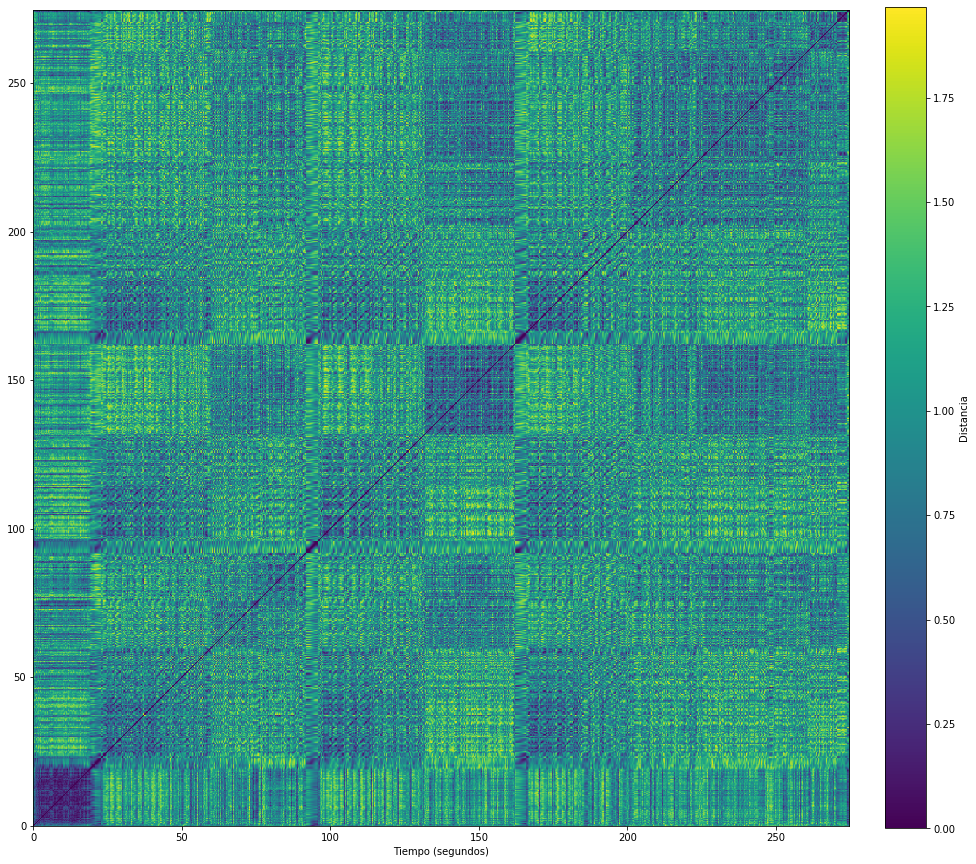

In [14]:
ss = StandardScaler()
timbre_norm = ss.fit_transform(timbre_interpolado)

recurrencia_coseno = squareform(pdist(timbre_norm, metric='cosine'))

plt.figure(figsize=(16,16))
plt.imshow(recurrencia_coseno,aspect='auto',origin='bottom',extent=[0,last,0,last]);
plt.colorbar(label='Distancia',fraction=0.046, pad=0.04)
plt.gca().set_aspect('equal')
plt.xlabel('Tiempo (segundos)');

Una forma de mejorar esta representación es indicando cuantos vecinos (k) se quiere considerar y transformando los valores de distancias o disimilaridades a afinidad. El paquete librosa tiene una función especial para hacer eso.

Text(0.5, 0, 'Tiempo (segundos)')

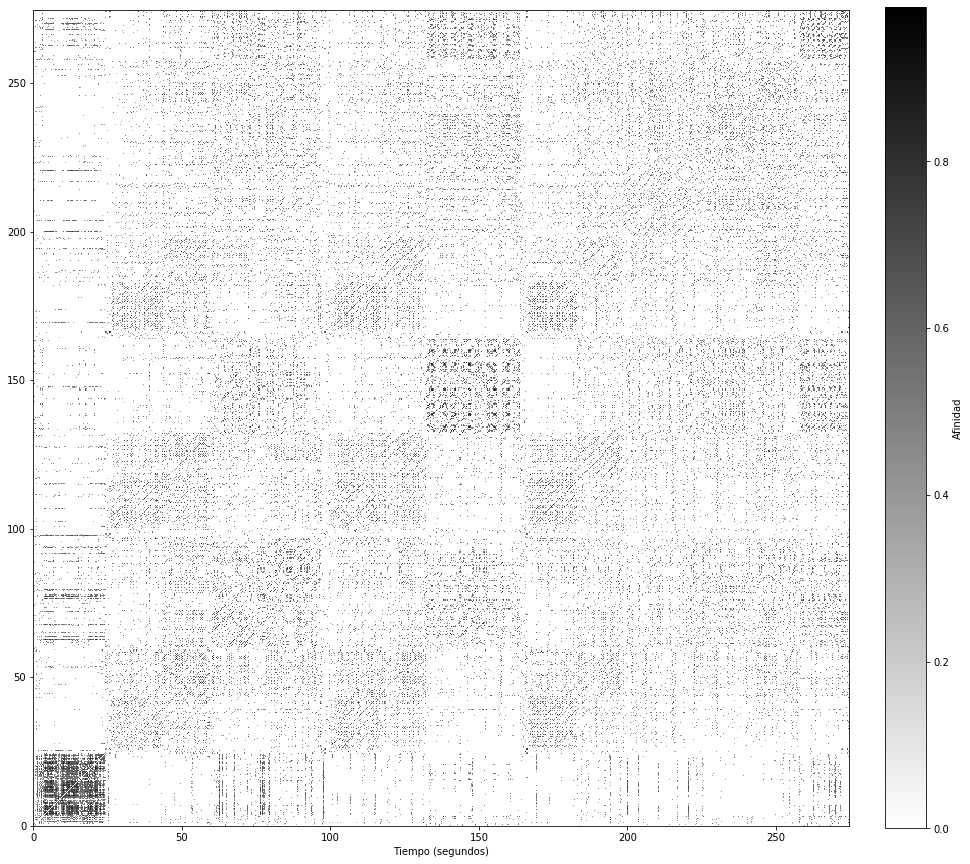

In [15]:
recurrencia_afinidad = librosa.segment.recurrence_matrix(timbres.T,mode='affinity',sym=True, k = 100,metric='cosine')
plt.figure(figsize=(16,16))
plt.imshow(recurrencia_afinidad,aspect='auto',origin='bottom',extent=[0,last,0,last],cmap=plt.cm.gray_r)
plt.colorbar(label='Afinidad',fraction=0.046, pad=0.04)
plt.gca().set_aspect('equal')
plt.xlabel('Tiempo (segundos)')

Finalmente es posible suavizar esta representación para obtener algo más robusto. Librosa trae una función para hacer eso realzando las diagonales en el sentido temporal.

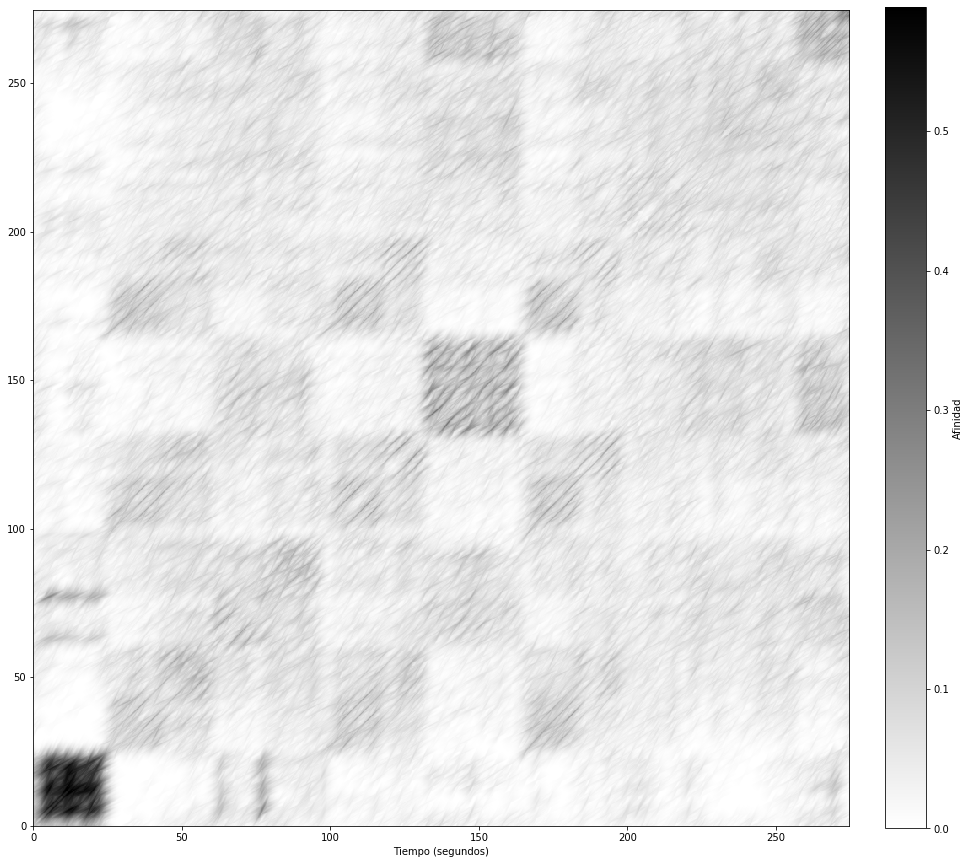

In [16]:
recurrencia_suave = librosa.segment.path_enhance(recurrencia_afinidad, 31, window='hann', n_filters=10)
plt.figure(figsize=(16,16))
plt.imshow(recurrencia_suave,aspect='auto',origin='bottom',extent=[0,last,0,last],cmap=plt.cm.gray_r);
plt.colorbar(label='Afinidad',fraction=0.046, pad=0.04)
plt.gca().set_aspect('equal')
plt.xlabel('Tiempo (segundos)');

Esta matriz suavizada le da de cierta forma coherencia temporal a las distancias. Es decir, si dos instantes de tiempo suenan parecido también sonaran parecido los instantes inmediatamente consecutivos.

Al forzar esto, es posible tratar de hacer algún tipo de clustering para reconocer las secciones que se repiten en el audio (estribillos, estrofas, etc).

Este artículo [1] sugiere realizar clustering sobre los primeros autovectores de la matriz de recurrencia. En cierta medida es similar a cuando se hace PCA y se toman las primeras componentes. Esta técnica se conoce como clustering espectral (los matemáticos suelen hablar de espectro de autovalores, por eso el nombre).

[1] McFee, B., & Ellis, D. (2014). Analyzing Song Structure with Spectral Clustering. In ISMIR (pp. 405-410).

In [17]:
# Cálculo de autovectores de la matriz suavizada
autovalores, autovectores = np.linalg.eig(recurrencia_suave)

Se toman los primeros 2 autovectores y se visualizan las secciones que encuentra sobre la matriz.

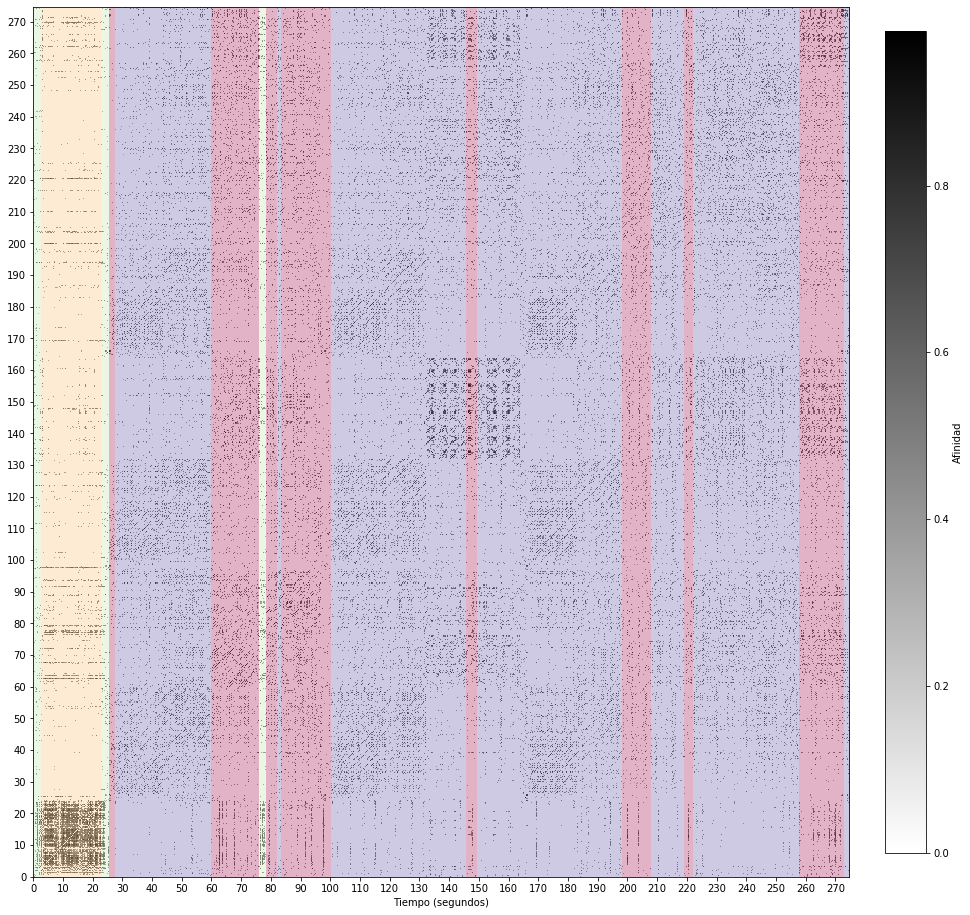

In [19]:
km = KMeans(n_clusters=4)
km.fit(autovectores[:,:2])

plt.figure(figsize=(16,16))
plt.imshow(recurrencia_afinidad, aspect='auto', origin='bottom', extent=[0,last,0,last], cmap=plt.cm.gray_r)
plt.colorbar(label='Afinidad',fraction=0.046, pad=0.04)
plt.gca().set_aspect('equal')
plt.xlabel('Tiempo (segundos)')

# Se agregan más ticks en los ejes para poder seguir mejor la canción
plt.xticks(range(0, 1000, 10))
plt.yticks(range(0, 1000, 10))

plt.imshow(km.labels_*np.ones(recurrencia_suave.shape),aspect='auto',cmap=plt.cm.Spectral,alpha=0.3, extent=[0,last,0,last])

# Análisis de la canción

 * 0s - 22s: Una introducción de voces masculinas, coros y risas. Ese barullo que se ve en el cluster amarillo claramente son esas voces y risotadas.
 * 22s: Hay un breve silencio y comienza el bandoneón. El cluster violeta arranca más o menos a los 27 segundos.
 * 1m (60s): Cambia bastante el ritmo, entra un piano y un violín y la música se acelera. Se entra en el cluster bordó.
 * 1m 32s (92s): Un silencio. El ritmo tranquilo comienzo en 1m 35s.
 * 1m 40s (100s): Se vuelve al cluster violeta porque volvió el ritmo tranquilo.
 * 2m 12s (132 s): En la matriz de distancia se ve cómo empieza a rasguear los violines bien fuerte (puntos de afinidad intensa), mientras sigue el cluster violeta del bandoneón más o menos tranquilo.
 * 2m 27s (145s): Intromisión muy esporádica del cluster bordó hasta los 2m 30s (150s). Es que el violín sube de intensidad y entra el piano por un momento. El ritmo ya no es tranquilo.
 * 2m 42s (162s): Se vuelve a tener un silencio.
 * 2m 46s (166s): Retoma el ritmo tranquilo de bandoneón característico del cluster violeta. Se puede ver que la matriz de distancia se calma, baja la afinidad.
 * 3m 18s (198s): El cluster violeta sigue su patrón en el que una vez más va subiendo de intensidad, hasta que la intensidad es tal que vuelve a entrometerse el cluster bordó, hasta los 3m 28s (208s). Aquí hay un cambio brusco en la melodía donde destaca un violín desde los 3m 21s (201s).
 * 3m 28 (208s): Aunque el violín sigue y hay unos tambores, el ritmo no es tan acelerado (es más bien pesado) y la canción vuelve a caer temporariamente en el cluster violeta hasta los 3m 38s (218s).
 * 3m 38s (218s): Una ráfaga de cluster bordó.
 * 3m 42s (222s): Se vuelve al cluster violeta. El ritmo no es tranquilo. Por eso se oscila entre el cluster violeta y el bordó, y va subiendo la intensidad.
 * 4m 17s (257s): Se acerca el final, de vuelta en el cluster bordó, el ritmo se acelera. A los 4m 20s, el bandoneón se acelera con notas nuevas. En la matriz de distancia se ven puntos salpicados de afinidad.
 * 4m 40s (270s): Final. Último estertor y última franja de silencio de cluster violeta. En realidad el tema termina unos 2 o 3 segundos antes. Lo que parece indicar que la data está un poco corrida.
 
**Creo que lo que hace que no coincida 100% con los segundos exactos es la interpolación realizada en la serie para lograr que la frecuencia de muestreo sea constante.**